# **Visualisation des parcelles dédiées à l'agriculture biologique en France** 

## Contexte du projet
Dans le cadre de ce projet, l'objectif est d'analyser et de visualiser les parcelles agricoles certifiées en agriculture biologique en France. Le but est de mieux comprendre leur répartition géographique et leur importance relative selon les régions et les départements. Cela permettra de fournir une vision claire et exploitable des données, tout en mettant en lumière les disparités territoriales et les tendances actuelles.

## Partie dédiée au mapping
Pour cette partie spécifique du projet, nous utilisons des données géospatiales représentant les parcelles agricoles en France. Ces données initiales sont souvent volumineuses et complexes à traiter directement, notamment à cause des colonnes contenant des informations sur la géométrie (geometry).

### Rôle du code
Le code est conçu pour :
- Charger les données géospatiales provenant de fichiers (par exemple, shapefiles ou GeoJSON).
- Effectuer les transformations nécessaires, y compris le nettoyage, le regroupement et l'agrégation.
- Générer une carte thématique des parcelles biologiques, en utilisant des outils de visualisation comme `folium` ou `matplotlib` pour représenter les données par département.

### Technologies et bibliothèques utilisées
- **Python** : Langage principal pour le traitement des données et la création des visualisations.
- **Pandas** : Pour la manipulation et l'analyse des données tabulaires.
- **Geopandas** : Pour le traitement des données géospatiales.
- **Matplotlib/Folium** : Pour les visualisations cartographiques.

In [1]:
!pip install chardet 


In [2]:
import requests
import zipfile
import os
import pandas as pd

# URL du fichier ZIP
url_zip = "https://www.data.gouv.fr/fr/datasets/r/e8639487-199c-4e30-8998-1b517148fe29"

# Chemin pour stocker temporairement le fichier ZIP
zip_path = "data.zip"

# Télécharger le fichier ZIP
response = requests.get(url_zip)
with open(zip_path, "wb") as f:
    f.write(response.content)

# Extraire le contenu du fichier ZIP
extract_path = "data_extracted"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Identifier les fichiers extraits (y compris sous-dossiers)
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            df = pd.read_csv(csv_path)
            print("Aperçu du fichier CSV chargé :")
            print(df.head())
        elif file.endswith(".shp"):
            import geopandas as gpd
            shp_path = os.path.join(root, file)
            gdf = gpd.read_file(shp_path)
            print("Aperçu du fichier SHP chargé :")
            print(gdf.head())


/opt/conda/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: data_extracted/rpg-bio-2023-national/rpg-bio-2023-national.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Aperçu du fichier SHP chargé :
       gid  millesime code_cultu precision_  \
0  1057718       2023        SPH       None   
1  1057720       2023        MCR        001   
2  1057733       2023        LUZ        002   
3  1045691       2023        SPH       None   
4  1063649       2023        MLG        001   

                                          lbl_cultur         grp_cultur  \
0  Prairie avec herbe prédominante et ressources ...  Estives et landes   
1  Mélange de céréales ou pseudo-céréales d'hiver...    Autres céréales   
2                                      Autre luzerne           Fourrage   
3  Prairie avec herbe prédominante et ressources ...  Estives et landes   
4  Mélange de légumineuses prépondérantes et de g...           Fourrage   

   surface_ha code_commu         lbl_commun    code_epci code_depar  \
0        0.56      12294  Vézins-de-Lévézou  241200765.0         12   
1        2.22      12294  Vézins-de-Lévézou  241200765.0         12   
2        1.28      123

In [3]:
# Créer une nouvelle variable en supprimant la colonne 'geometry'
gdf_filtered_2023 = gdf.drop(columns=['geometry'])

# Afficher les premières lignes pour vérifier
print("Aperçu des données sans la colonne 'geometry' :")
print(gdf_filtered_2023.head())


Aperçu des données sans la colonne 'geometry' :
       gid  millesime code_cultu precision_  \
0  1057718       2023        SPH       None   
1  1057720       2023        MCR        001   
2  1057733       2023        LUZ        002   
3  1045691       2023        SPH       None   
4  1063649       2023        MLG        001   

                                          lbl_cultur         grp_cultur  \
0  Prairie avec herbe prédominante et ressources ...  Estives et landes   
1  Mélange de céréales ou pseudo-céréales d'hiver...    Autres céréales   
2                                      Autre luzerne           Fourrage   
3  Prairie avec herbe prédominante et ressources ...  Estives et landes   
4  Mélange de légumineuses prépondérantes et de g...           Fourrage   

   surface_ha code_commu         lbl_commun    code_epci code_depar  \
0        0.56      12294  Vézins-de-Lévézou  241200765.0         12   
1        2.22      12294  Vézins-de-Lévézou  241200765.0         12   
2    

In [4]:
import matplotlib.pyplot as plt

# Étape 1 : Compter le nombre de parcelles biologiques par département
parcelles_par_departement = gdf_filtered_2023['code_depar'].value_counts().reset_index()
parcelles_par_departement.columns = ['code_departement', 'nombre_parcelles']

# Étape 2 : Agréger la surface totale des parcelles biologiques par département
surface_par_departement = gdf_filtered_2023.groupby('code_depar')['surface_ha'].sum().reset_index()
surface_par_departement.columns = ['code_departement', 'surface_totale_ha']

# Fusionner les deux DataFrames pour avoir les deux informations
resultat = parcelles_par_departement.merge(surface_par_departement, on='code_departement')

# Trier les départements par surface totale (ou nombre de parcelles si préféré)
resultat = resultat.sort_values(by='surface_totale_ha', ascending=False)

# Afficher les résultats
print("Départements avec le plus de parcelles biologiques :")
print(resultat)



Départements avec le plus de parcelles biologiques :
   code_departement  nombre_parcelles  surface_totale_ha
2                32             36484          115319.18
58               65              7900          103096.45
1                44             39764           87245.72
4                12             31583           77857.75
3                11             32074           68744.30
..              ...               ...                ...
92              972               679             626.78
96              976               102              73.61
98               93                24              60.55
97               94                39              54.30
99              978                 4              44.83

[100 rows x 3 columns]


In [7]:
# Dictionnaire code_region -> nom de la région (métropole)
region_mapping = {
    '11': 'Île-de-France',
    '24': 'Centre-Val de Loire',
    '27': 'Bourgogne-Franche-Comté',
    '28': 'Normandie',
    '32': 'Hauts-de-France',
    '44': 'Grand Est',
    '52': 'Pays de la Loire',
    '53': 'Bretagne',
    '75': 'Nouvelle-Aquitaine',
    '76': 'Occitanie',
    '84': 'Auvergne-Rhône-Alpes',
    '93': 'Provence-Alpes-Côte d\'Azur',
    '94': 'Corse'
}

# Filtrer le DataFrame pour ne garder que les codes régions métropolitaines
gdf_filtered_2023 = gdf_filtered_2023[gdf_filtered_2023['code_regio'].astype(str).isin(region_mapping.keys())]

# Créer une colonne nom_region à partir des codes
gdf_filtered_2023['nom_region'] = gdf_filtered_2023['code_regio'].astype(str).map(region_mapping)

# Vérification
print(gdf_filtered_2023[['code_regio', 'nom_region']].drop_duplicates())


        code_regio                  nom_region
0               76                   Occitanie
54              93  Provence-Alpes-Côte d'Azur
183             27     Bourgogne-Franche-Comté
217             75          Nouvelle-Aquitaine
849             28                   Normandie
858             84        Auvergne-Rhône-Alpes
1694            24         Centre-Val de Loire
13073           53                    Bretagne
27685           44                   Grand Est
76926           11               Île-de-France
79321           94                       Corse
141334          52            Pays de la Loire
248525          32             Hauts-de-France


/tmp/ipykernel_65617/1810471358.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_filtered_2023['nom_region'] = gdf_filtered_2023['code_regio'].astype(str).map(region_mapping)


In [8]:
gdf_filtered_2023.head()

,gid,millesime,code_cultu,precision_,lbl_cultur,grp_cultur,surface_ha,code_commu,lbl_commun,code_epci,code_depar,code_regio,zone_geo,nom_region
0,1057718,2023,SPH,None,Prairie avec herbe prédominante et ressources ...,Estives et landes,0.56,12294,Vézins-de-Lévézou,241200765.0,12,76,France mét.,Occitanie
1,1057720,2023,MCR,001,Mélange de céréales ou pseudo-céréales d'hiver...,Autres céréales,2.22,12294,Vézins-de-Lévézou,241200765.0,12,76,France mét.,Occitanie
2,1057733,2023,LUZ,002,Autre luzerne,Fourrage,1.28,12303,Vimenet,200068484.0,12,76,France mét.,Occitanie
3,1045691,2023,SPH,None,Prairie avec herbe prédominante et ressources ...,Estives et landes,10.78,12145,Millau,241200567.0,12,76,France mét.,Occitanie
4,1063649,2023,MLG,001,Mélange de légumineuses prépondérantes et de g...,Fourrage,2.77,12059,Castanet,200068831.0,12,76,France mét.,Occitanie


In [33]:
# Téléchargement du support de la map pour visualisation data
gdf_france= 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
gdf_departements = gpd.read_file(gdf_france)
gdf_counts = gdf_filtered_2023.groupby('nom_region').size().reset_index(name='nb_parcelles_bio')



In [34]:
# Si code_regio est de type int
metropolitan_codes = [11,24,27,28,32,44,52,53,75,76,84,93,94]
gdf_metropole = gdf_filtered_2023[gdf_filtered_2023['code_regio'].isin(metropolitan_codes)]
print(gdf_filtered_2023['code_regio'].unique())
total_metropole = len(gdf_metropole)
print("Le nombre total de parcelles bio en métropole est :", total_metropole)

[76 93 27 75 28 84 24 53 44 11 94 52 32]
Le nombre total de parcelles bio en métropole est : 1160919


In [ ]:
#Création d'une variable contenant le ratio de parcelles bio par région
gdf_counts['ratio_parcelles_bio'] = (gdf_counts['nb_parcelles_bio'] / total_metropole) *100
gdf_merged = gdf_departements.merge(gdf_counts, left_on='nom', right_on='nom_region', how='left')
gdf_merged.head()

,code,nom,geometry,nom_region,nb_parcelles_bio,ratio_parcelles_bio
0,11,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...",Île-de-France,10428.0,0.898254
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",Centre-Val de Loire,34573.0,2.978072
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6...",Bourgogne-Franche-Comté,69941.0,6.024624
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...",Normandie,41039.0,3.535044
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",Hauts-de-France,18357.0,1.581247


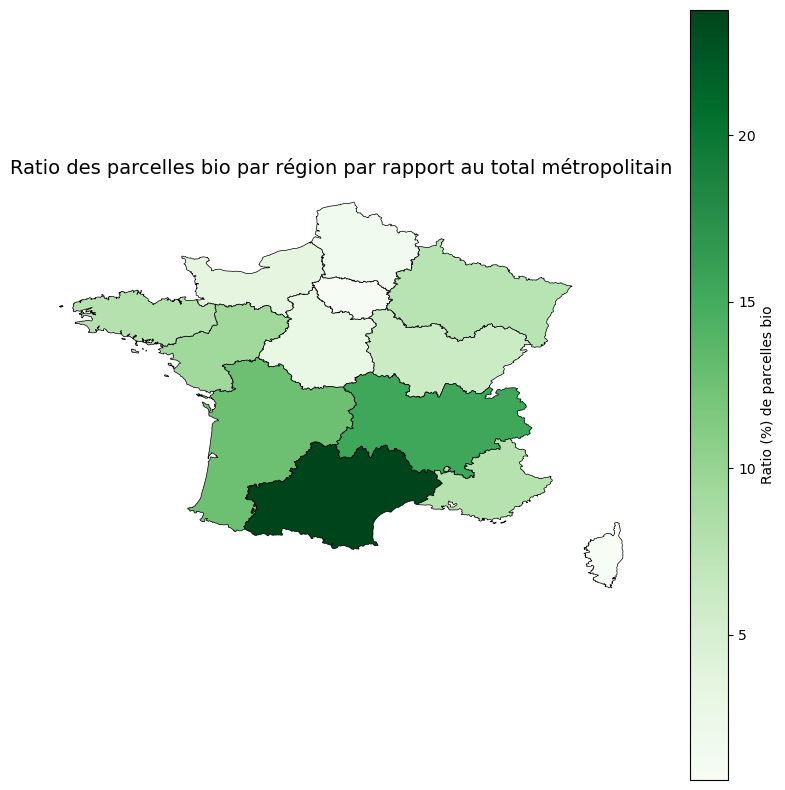

In [38]:
# Visualisation du ratio sur la map de la France 

fig, ax = plt.subplots(figsize=(10,10))
gdf_merged.plot(column='ratio_parcelles_bio', 
                   cmap='Greens', 
                   legend=True,
                   legend_kwds={'label': "Ratio (%) de parcelles bio"},
                   ax=ax,
                   edgecolor='black',
                   linewidth=0.5)


ax.set_title("Ratio des parcelles bio par région par rapport au total métropolitain", fontdict={'fontsize': 14})
ax.axis('off')
plt.show()



## Visualisation sur la carte de la France métropolitaine (départementale)

### Même méthodologie que sur la carte des régions 

In [39]:
#Chargement de la carte des départements
dept_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_departements = gpd.read_file(dept_url)

In [41]:
# Liste des codes à exclure (DOM-TOM) : 971, 972, 973, 974, 976, etc.
overseas_codes = ['971', '972', '973', '974', '976']
gdf_metropole = gdf_filtered_2023[~gdf_filtered_2023['code_depar'].isin(overseas_codes)]


In [43]:
# 4. Grouper par département pour obtenir le nombre de parcelles par département
gdf_dep = gdf_metropole.groupby('code_depar').size().reset_index(name='nb_parcelles_bio')

# 5. Calculer le ratio
gdf_dep['ratio_parcelles'] = gdf_dep['nb_parcelles_bio'] / total_metropole * 100

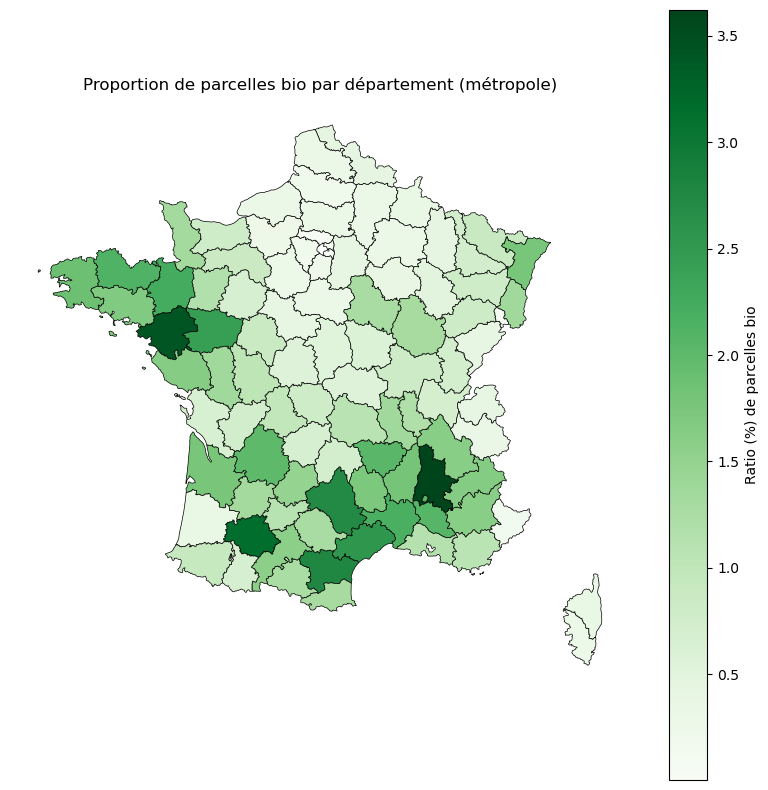

In [44]:
gdf_dep_final = gdf_departements.merge(gdf_dep, how='left', left_on='code', right_on='code_depar')

# 7. Visualiser la carte
fig, ax = plt.subplots(figsize=(10,10))
gdf_dep_final.plot(column='ratio_parcelles', 
                   cmap='Greens', 
                   legend=True,
                   legend_kwds={'label': "Ratio (%) de parcelles bio"},
                   ax=ax,
                   edgecolor='black',
                   linewidth=0.5)

ax.set_title("Proportion de parcelles bio par département (métropole)")
ax.axis('off')
plt.show()

Les résultats obtenus (région et département) sont conformes aux différents mapping de l'INSEE sur les régions les plus agricoles. On s'attend à une proportion plus élevée dans les zones où l'agriculture est déjà très implémentée 


# Analyse sur les 4 années qui précèdent 2023 (2019-2022)

In [ ]:
import requests
import pandas as pd
import os
import geopandas as gpd
import zipfile
import json
import gzip

# Dictionnaire des URLs par année
urls = {
    2022: 'https://www.data.gouv.fr/fr/datasets/r/36314eff-2712-4d6a-b091-7752a5b318bb',
    2021: 'https://www.data.gouv.fr/fr/datasets/r/e6cd3b9f-38e2-47ca-aac6-5acfb9567e01',
    2020: 'https://www.data.gouv.fr/fr/datasets/r/d3dbbf84-55d4-4516-9264-29f958778e5c',
    2019: 'https://www.data.gouv.fr/fr/datasets/r/a0d9e304-97d0-4871-ad32-70a5c47aa71d'
}

for year, url_zip in urls.items():
    print(f"Traitement de l'année {year}...")

    # Chemin pour stocker temporairement le fichier téléchargé
    file_path = f"data_{year}"

    # Télécharger le fichier
    response = requests.get(url_zip)
    if response.status_code != 200:
        print(f"Erreur lors du téléchargement pour l'année {year}: {response.status_code}")
        continue

    # Enregistrer le fichier localement
    with open(file_path, "wb") as f:
        f.write(response.content)

    # Vérifier si le fichier est un ZIP
    if zipfile.is_zipfile(file_path):
        print(f"Extraction du fichier ZIP pour l'année {year}")
        extract_path = f"data_extracted_{year}"
        if not os.path.exists(extract_path):
            os.makedirs(extract_path)
        with zipfile.ZipFile(file_path, "r") as zip_ref:
            zip_ref.extractall(extract_path)
        # Lire tous les fichiers CSV extraits
        for root, _, files in os.walk(extract_path):
            for file in files:
                if file.endswith(".csv"):
                    gdf = pd.read_csv(os.path.join(root, file))
                    globals()[f"gdf{year}"] = gdf.drop(columns='geometry', errors='ignore')
                    print(f"Aperçu des données pour {year} :")
                    print(globals()[f"gdf{year}"].head())

    else:
        # Traiter les fichiers GeoJSON ou compressés GZIP
        try:
            with gzip.open(file_path, 'rb') as f:
                data = json.load(f)
                if "type" in data and data["type"] == "FeatureCollection":
                    print(f"Le fichier téléchargé pour {year} est un GeoJSON valide.")
                    gdf = pd.json_normalize(data['features'])  # Convertir GeoJSON en DataFrame
                    gdf = gdf.drop(columns='geometry', errors='ignore')  # Supprimer 'geometry'
                    globals()[f"gdf{year}"] = gdf
                    print(f"Aperçu des données pour {year} :")
                    print(globals()[f"gdf{year}"].head())
                else:
                    print(f"Format inconnu pour le fichier de l'année {year}.")
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier pour {year}: {e}")

# Vérification des variables créées
print("\nVariables disponibles :")
for year in urls.keys():
    var_name = f"gdf{year}"
    if var_name in globals():
        print(f"- {var_name} : {len(globals()[var_name])} lignes")


Traitement de l'année 2022...


Extraction du fichier ZIP pour l'année 2022
Traitement de l'année 2021...
Extraction du fichier ZIP pour l'année 2021
Traitement de l'année 2020...
Le fichier téléchargé pour 2020 est un GeoJSON valide.
Aperçu des données pour 2020 :
      type  properties.MILLESIME  properties.BIO properties.CODE_CULTU  \
0  Feature                2020.0             1.0                   PPH   
1  Feature                2020.0             1.0                   SPH   
2  Feature                2020.0             1.0                   VRG   
3  Feature                2020.0             1.0                   VRG   
4  Feature                2020.0             1.0                   VRG   

                                properties.LBL_CULTU  properties.GRP_CULTU  \
0  Prairie permanente - herbe prédominante (resso...  Prairies permanentes   
1  Surface pastorale - herbe prédominante et ress...     Estives et landes   
2                                             Verger               Vergers   
3        

In [ ]:


# Dictionnaire des URLs par année
urls = {
    2022: 'https://www.data.gouv.fr/fr/datasets/r/36314eff-2712-4d6a-b091-7752a5b318bb',
    2021: 'https://www.data.gouv.fr/fr/datasets/r/e6cd3b9f-38e2-47ca-aac6-5acfb9567e01',
}

for year, url_zip in urls.items():
    print(f"\nTraitement de l'année {year}...")

    # Chemin pour stocker temporairement le fichier téléchargé
    file_path = f"data_{year}.zip"

    # Télécharger le fichier
    response = requests.get(url_zip)
    if response.status_code != 200:
        print(f"Erreur lors du téléchargement pour l'année {year}: {response.status_code}")
        continue

    # Enregistrer le fichier localement
    with open(file_path, "wb") as f:
        f.write(response.content)

    # Vérifier si le fichier est un ZIP
    if zipfile.is_zipfile(file_path):
        print(f"Extraction du fichier ZIP pour l'année {year}")
        extract_path = f"data_extracted_{year}"
        if not os.path.exists(extract_path):
            os.makedirs(extract_path)
        with zipfile.ZipFile(file_path, "r") as zip_ref:
            zip_ref.extractall(extract_path)

        # Afficher tous les fichiers extraits pour diagnostic
        print(f"Fichiers extraits pour {year} :")
        extracted_files = []
        for root, _, files in os.walk(extract_path):
            for file in files:
                extracted_files.append(os.path.join(root, file))
                print(f"- {file}")

        # Lire les fichiers extraits si ce sont des CSV
        for file in extracted_files:
            if file.endswith(".csv"):
                gdf = pd.read_csv(file)
                globals()[f"gdf{year}"] = gdf.drop(columns='geometry', errors='ignore')
                print(f"Aperçu des données pour {year} :")
                print(globals()[f"gdf{year}"].head())
    else:
        print(f"Le fichier pour {year} n'est pas un ZIP.")



Traitement de l'année 2022...
Extraction du fichier ZIP pour l'année 2022
Fichiers extraits pour 2022 :
- rpg-bio-2022-national.gpkg
- ._rpg-bio-2022-national.gpkg

Traitement de l'année 2021...
Extraction du fichier ZIP pour l'année 2021
Fichiers extraits pour 2021 :
- rpg-bio-2021-national.gpkg


In [ ]:
import geopandas as gpd

# Chemins vers les fichiers extraits
file_2022 = "data_extracted_2022/rpg-bio-2022-national.gpkg"
file_2021 = "data_extracted_2021/rpg-bio-2021-national.gpkg"

# Charger les fichiers dans des variables distinctes
gdf2022 = gpd.read_file(file_2022)
gdf2021 = gpd.read_file(file_2021)

# Afficher un aperçu des données
print("Aperçu des données pour 2022 :")
print(gdf2022.head())

print("\nAperçu des données pour 2021 :")
print(gdf2021.head())


Aperçu des données pour 2022 :
       gid  millesime code_culture  \
0  4420687       2022          PPH   
1      333       2022          PTR   
2      337       2022          BTH   
3      464       2022          BTH   
4      480       2022          BTH   

                                         lbl_culture           grp_culture  \
0  Prairie permanente - herbe prédominante (resso...  Prairies permanentes   
1         Autre prairie temporaire de 5 ans ou moins  Prairies temporaires   
2                                 Blé tendre d’hiver            Blé tendre   
3                                 Blé tendre d’hiver            Blé tendre   
4                                 Blé tendre d’hiver            Blé tendre   

   surface_ha code_commune_insee             lbl_commune    code_epci  \
0        0.38              38513                Treffort  200030658.0   
1        2.13              01188                  Illiat  200070118.0   
2        6.10              01136  Cruzilles-lès-Mépi

In [ ]:
gdfs = {
    "gdf2019": gdf2019,
    "gdf2020": gdf2020,
    "gdf2021": gdf2021,
    "gdf2022": gdf2022
}

for name, gdf in gdfs.items():
    print(f"Colonnes pour {name} :")
    print(gdf.columns)
    print("\n")  # Ligne vide pour une meilleure lisibilité


Colonnes pour gdf2019 :
Index(['type', 'properties.MILLESIME', 'properties.BIO',
       'properties.CODE_CULTU', 'properties.LBL_CULTU', 'properties.GRP_CULTU',
       'properties.SURFACE_HA', 'geometry.type', 'geometry.coordinates',
       'geometry'],
      dtype='object')


Colonnes pour gdf2020 :
Index(['type', 'properties.MILLESIME', 'properties.BIO',
       'properties.CODE_CULTU', 'properties.LBL_CULTU', 'properties.GRP_CULTU',
       'properties.SURFACE_HA', 'geometry.type', 'geometry.coordinates',
       'geometry'],
      dtype='object')


Colonnes pour gdf2021 :
Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'code_region', 'zone_geo', 'geometry'],
      dtype='object')


Colonnes pour gdf2022 :
Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_depa

In [ ]:
import geopandas as gpd
from shapely.geometry import shape

def harmoniser_ancien_format(gdf_ancien):
    # Renommer les colonnes
    gdf_ancien = gdf_ancien.rename(columns={
        'properties.MILLESIME': 'millesime',
        'properties.BIO': 'bio',
        'properties.CODE_CULTU': 'code_culture',
        'properties.LBL_CULTU': 'lbl_culture',
        'properties.GRP_CULTU': 'grp_culture',
        'properties.SURFACE_HA': 'surface_ha'
    })

    # Créer la geometry à partir des colonnes geometry.type et geometry.coordinates
    gdf_ancien['geometry'] = gdf_ancien.apply(
        lambda row: shape({"type": row["geometry.type"], "coordinates": row["geometry.coordinates"]}),
        axis=1
    )

    # Supprimer les colonnes devenues inutiles
    gdf_ancien = gdf_ancien.drop(columns=['type', 'geometry.type', 'geometry.coordinates'])

    # Optionnel : ajouter les colonnes vides pour s'aligner sur 2021/2022
    # si nécessaire, à vous de voir si cela est pertinent
    for col in ['gid', 'code_commune_insee', 'lbl_commune', 'code_epci', 'code_departement', 'code_region', 'zone_geo']:
        if col not in gdf_ancien.columns:
            gdf_ancien[col] = None

    # Convertir en GeoDataFrame
    gdf_ancien = gpd.GeoDataFrame(gdf_ancien, geometry='geometry', crs="EPSG:4326")

    return gdf_ancien

# Harmoniser gdf2019 et gdf2020 par exemple
gdf2019_harmo = harmoniser_ancien_format(gdf2019)
gdf2020_harmo = harmoniser_ancien_format(gdf2020)

# Vos gdf sont maintenant plus homogènes. Vous pourrez les concaténer ou les comparer à gdf2021, gdf2022.


In [ ]:
gdf_regions = gpd.read_file("https://france-geojson.gregoiredavid.fr/repo/regions.geojson")
gdf_departements = gpd.read_file("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson")

gdf_regions = gdf_regions.to_crs("EPSG:4326")
gdf_departements = gdf_departements.to_crs("EPSG:4326")


In [ ]:
# Charger les GeoDataFrames des régions et départements
regions_url = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
departements_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

gdf_regions = gpd.read_file(regions_url)
gdf_departements = gpd.read_file(departements_url)

# Assurez-vous que tous les GeoDataFrames sont en CRS EPSG:4326
gdf_regions = gdf_regions.to_crs(epsg=4326)
gdf_departements = gdf_departements.to_crs(epsg=4326)
gdf2019_harmo = gdf2019_harmo.to_crs(epsg=4326)
gdf2020_harmo = gdf2020_harmo.to_crs(epsg=4326)

# Fonction pour nettoyer les GeoDataFrames en supprimant 'index_right' si présent
def clean_gdf(gdf, name):
    if 'index_right' in gdf.columns:
        gdf = gdf.drop(columns=['index_right'])
        print(f"'index_right' supprimé de {name}")
    return gdf

# Appliquer la fonction de nettoyage
gdf_regions = clean_gdf(gdf_regions, 'gdf_regions')
gdf_departements = clean_gdf(gdf_departements, 'gdf_departements')
gdf2019_harmo = clean_gdf(gdf2019_harmo, 'gdf2019_harmo')
gdf2020_harmo = clean_gdf(gdf2020_harmo, 'gdf2020_harmo')

In [ ]:
regions_url = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
departements_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
# Charger les GeoDataFrames
gdf_regions = gpd.read_file(regions_url)
gdf_departements = gpd.read_file(departements_url)

In [ ]:
# Fonction pour nettoyer 'index_right' si présent
def clean_gdf(gdf, name):
    if 'index_right' in gdf.columns:
        gdf = gdf.drop(columns=['index_right'])
        print(f"'index_right' supprimé de {name}")
    return gdf

# Appliquer la fonction de nettoyage
gdf_regions = clean_gdf(gdf_regions, 'gdf_regions')
gdf_departements = clean_gdf(gdf_departements, 'gdf_departements')
gdf2019_harmo = clean_gdf(gdf2019_harmo, 'gdf2019_harmo')
gdf2020_harmo = clean_gdf(gdf2020_harmo, 'gdf2020_harmo')


In [ ]:
# Jointure spatiale avec les départements
gdf2019_avec_dept = gpd.sjoin(gdf2019_harmo, gdf_departements, how="left", predicate="within")
gdf2020_avec_dept = gpd.sjoin(gdf2020_harmo, gdf_departements, how="left", predicate="within")

# Nettoyer 'index_right' après jointure avec départements
gdf2019_avec_dept = clean_gdf(gdf2019_avec_dept, 'gdf2019_avec_dept')
gdf2020_avec_dept = clean_gdf(gdf2020_avec_dept, 'gdf2020_avec_dept')

# Vérifier les colonnes après jointure
print("Colonnes après jointure avec départements (2019):")
print(gdf2019_avec_dept.columns)
print("\nColonnes après jointure avec départements (2020):")
print(gdf2020_avec_dept.columns)


'index_right' supprimé de gdf2019_avec_dept
'index_right' supprimé de gdf2020_avec_dept
Colonnes après jointure avec départements (2019):
Index(['millesime', 'bio', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'geometry', 'gid', 'code_commune_insee', 'lbl_commune',
       'code_epci', 'code_departement', 'code_region', 'zone_geo', 'code',
       'nom'],
      dtype='object')

Colonnes après jointure avec départements (2020):
Index(['millesime', 'bio', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'geometry', 'gid', 'code_commune_insee', 'lbl_commune',
       'code_epci', 'code_departement', 'code_region', 'zone_geo', 'code',
       'nom'],
      dtype='object')


In [ ]:
# Renommer les colonnes pour harmonisation
def rename_columns_departements(gdf, year):
    rename_dict = {}
    if 'code_right' in gdf.columns:
        rename_dict['code_right'] = 'code_departement'
    if 'nom_right' in gdf.columns:
        rename_dict['nom_right'] = 'nom_departement'

    gdf = gdf.rename(columns=rename_dict)

    # Garder uniquement les colonnes nécessaires
    columns_to_keep = [
        'gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
        'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
        'code_departement', 'geometry', 'nom_departement'
    ]

    # Garder les colonnes existantes
    columns_to_keep = [col for col in columns_to_keep if col in gdf.columns]
    gdf = gdf[columns_to_keep]

    return gdf

# Appliquer le renommage
gdf2019_avec_dept = rename_columns_departements(gdf2019_avec_dept, 2019)
gdf2020_avec_dept = rename_columns_departements(gdf2020_avec_dept, 2020)

# Vérifier les colonnes après renommage
print("Colonnes après renommage (2019):")
print(gdf2019_avec_dept.columns)
print("\nColonnes après renommage (2020):")
print(gdf2020_avec_dept.columns)


Colonnes après renommage (2019):
Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'geometry'],
      dtype='object')

Colonnes après renommage (2020):
Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'geometry'],
      dtype='object')


In [ ]:
# Renommer les colonnes 'code' et 'nom' en 'code_departement' et 'nom_departement'
gdf_departements = gdf_departements.rename(columns={
    'code': 'code_departement',
    'nom': 'nom_departement'
})

# Vérifier les nouvelles colonnes
print("Colonnes après renommage de gdf_departements :", gdf_departements.columns)


Colonnes après renommage de gdf_departements : Index(['code_departement', 'nom_departement', 'geometry'], dtype='object')


In [ ]:
gdf2021.columns

Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'code_region', 'zone_geo', 'geometry'],
      dtype='object')

In [ ]:
# Sélectionner uniquement les colonnes pertinentes
def select_columns_departements(gdf, year):
    columns_to_keep = [
        'gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
        'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
        'code_departement', 'geometry'
    ]
    # Garder les colonnes existantes
    columns_to_keep = [col for col in columns_to_keep if col in gdf.columns]
    return gdf[columns_to_keep]

# Appliquer la sélection des colonnes
gdf2019_avec_dept = select_columns_departements(gdf2019_avec_dept, 2019)
gdf2020_avec_dept = select_columns_departements(gdf2020_avec_dept, 2020)

# Ajouter 'nom_departement' à gdf2021 et gdf2022 en les joignant avec gdf_departements
def add_nom_departement(gdf, gdf_departements_geo):
    # Merge to get 'nom_departement' based on 'code_departement'
    gdf = gdf.merge(
        gdf_departements_geo[['code_departement', 'nom_departement']],
        on='code_departement',
        how='left'
    )
    return gdf

# Appliquer pour gdf2021 et gdf2022
gdf2021 = add_nom_departement(gdf2021, gdf_departements)
gdf2022 = add_nom_departement(gdf2022, gdf_departements)

# Sélectionner uniquement les colonnes pertinentes pour gdf2021 et gdf2022
gdf2021 = select_columns_departements(gdf2021, 2021)
gdf2022 = select_columns_departements(gdf2022, 2022)

# Ajouter 'nom_departement' aux gdf2019 et gdf2020 (après jointure spatiale)
# Les GeoDataFrames gdf2019_avec_dept et gdf2020_avec_dept ont déjà 'nom_departement'


In [ ]:
# Liste des GeoDataFrames pour chaque année
gdfs_departements = {
    2021: gdf2021,
    2022: gdf2022
}

# Fonction pour calculer le ratio par département
def calculate_ratio_departements(gdf, gdf_departements_geo, year):
    # Calculer le nombre de parcelles bio par département
    df_dep = gdf.groupby('code_departement').size().reset_index(name='nb_parcelles')

    # Calculer le total métropole
    total_metropole = df_dep['nb_parcelles'].sum()

    # Calculer le ratio (en pourcentage)
    df_dep['ratio_parcelles'] = (df_dep['nb_parcelles'] / total_metropole) * 100

    # Joindre avec les départements géographiques pour obtenir 'nom_departement'
    gdf_merged = gdf_departements_geo.merge(df_dep, on='code_departement', how='left')

    # Remplir les valeurs manquantes par 0
    gdf_merged['ratio_parcelles'] = gdf_merged['ratio_parcelles'].fillna(0)

    # Ajouter l'année comme colonne
    gdf_merged['annee'] = year

    return gdf_merged

# Calculer les ratios pour chaque année
merged_departements_dict = {}
for year, gdf in gdfs_departements.items():
    print(f"Calcul du ratio pour l'année {year}...")
    merged = calculate_ratio_departements(gdf, gdf_departements, year)
    merged_departements_dict[year] = merged

# Vérifier le contenu des merged_departements_dict
for year, gdf in merged_departements_dict.items():
    print(f"Année {year} :")
    print(gdf[['code_departement', 'nom_departement', 'nb_parcelles', 'ratio_parcelles']].head())
    print("\n")



Calcul du ratio pour l'année 2021...


KeyError: 'code_departement'

KeyError: 'ratio_parcelles'

In [ ]:
# Vérifier le CRS de chaque GeoDataFrame
print("CRS de gdf_departements :", gdf_departements.crs)
print("CRS de gdf2019_harmo :", gdf2019_harmo.crs)
print("CRS de gdf2020_harmo :", gdf2020_harmo.crs)
print("CRS de gdf2021 :", gdf2021.crs)
print("CRS de gdf2022 :", gdf2022.crs)

# Harmoniser le CRS si nécessaire (choisissez un CRS commun, par exemple EPSG:4326)
target_crs = "EPSG:4326"

if gdf_departements.crs != target_crs:
    gdf_departements = gdf_departements.to_crs(target_crs)
    print("CRS de gdf_departements harmonisé à EPSG:4326")

if gdf2019_harmo.crs != target_crs:
    gdf2019_harmo = gdf2019_harmo.to_crs(target_crs)
    print("CRS de gdf2019_harmo harmonisé à EPSG:4326")

if gdf2020_harmo.crs != target_crs:
    gdf2020_harmo = gdf2020_harmo.to_crs(target_crs)
    print("CRS de gdf2020_harmo harmonisé à EPSG:4326")

if gdf2021.crs != target_crs:
    gdf2021 = gdf2021.to_crs(target_crs)
    print("CRS de gdf2021 harmonisé à EPSG:4326")

if gdf2022.crs != target_crs:
    gdf2022 = gdf2022.to_crs(target_crs)
    print("CRS de gdf2022 harmonisé à EPSG:4326")


CRS de gdf_departements : EPSG:4326
CRS de gdf2019_harmo : EPSG:4326
CRS de gdf2020_harmo : EPSG:4326
CRS de gdf2021 : EPSG:4326
CRS de gdf2022 : EPSG:4326


In [ ]:
# Fonction pour vérifier et corriger les géométries invalides
def check_and_fix_geometry(gdf, name):
    invalid = ~gdf.is_valid
    if invalid.any():
        print(f"Géométries invalides détectées dans {name}. Correction en cours...")
        gdf.loc[invalid, 'geometry'] = gdf.loc[invalid, 'geometry'].buffer(0)
        # Re-vérifier la validité
        invalid_after = ~gdf.is_valid
        if invalid_after.any():
            print(f"Des géométries invalides persistent dans {name}. Elles seront supprimées.")
            gdf = gdf[gdf.is_valid]
    else:
        print(f"Toutes les géométries sont valides dans {name}.")
    return gdf

# Appliquer la vérification et correction
gdf_departements = check_and_fix_geometry(gdf_departements, 'gdf_departements')
gdf2019_harmo = check_and_fix_geometry(gdf2019_harmo, 'gdf2019_harmo')
gdf2020_harmo = check_and_fix_geometry(gdf2020_harmo, 'gdf2020_harmo')
gdf2021 = check_and_fix_geometry(gdf2021, 'gdf2021')
gdf2022 = check_and_fix_geometry(gdf2022, 'gdf2022')


Toutes les géométries sont valides dans gdf_departements.
Géométries invalides détectées dans gdf2019_harmo. Correction en cours...
Géométries invalides détectées dans gdf2020_harmo. Correction en cours...
Géométries invalides détectées dans gdf2021. Correction en cours...
Géométries invalides détectées dans gdf2022. Correction en cours...


In [ ]:
# Fonction pour convertir GeoDataFrame en GeoJSON
def gdf_to_geojson_departements(gdf):
    return json.loads(gdf.to_json())

# Préparer les GeoJSON pour chaque année avec des dates correctes
geojson_yearly_departements = {}
for year, gdf in merged_departements_dict.items():
    geojson = gdf_to_geojson_departements(gdf)
    for feature in geojson['features']:
        feature['properties']['ratio'] = feature['properties'].get('ratio_parcelles', 0)
        # Définir 'time' au format ISO 8601
        feature['properties']['time'] = f"{year}-01-01"
    geojson_yearly_departements[year] = geojson['features']

# Combiner toutes les features
all_features_departements = []
for year, features in geojson_yearly_departements.items():
    all_features_departements.extend(features)

combined_geojson_departements = {
    'type': 'FeatureCollection',
    'features': all_features_departements
}


In [ ]:
import branca.colormap as cm

# Liste des colormaps disponibles
available_colormaps = [colormap for colormap in dir(cm.linear) if not colormap.startswith('_')]
print("Colormaps disponibles dans branca.colormap.linear :")
print(available_colormaps)


Colormaps disponibles dans branca.colormap.linear :
['Accent_03', 'Accent_04', 'Accent_05', 'Accent_06', 'Accent_07', 'Accent_08', 'Blues_03', 'Blues_04', 'Blues_05', 'Blues_06', 'Blues_07', 'Blues_08', 'Blues_09', 'BrBG_03', 'BrBG_04', 'BrBG_05', 'BrBG_06', 'BrBG_07', 'BrBG_08', 'BrBG_09', 'BrBG_10', 'BrBG_11', 'BuGn_03', 'BuGn_04', 'BuGn_05', 'BuGn_06', 'BuGn_07', 'BuGn_08', 'BuGn_09', 'BuPu_03', 'BuPu_04', 'BuPu_05', 'BuPu_06', 'BuPu_07', 'BuPu_08', 'BuPu_09', 'Dark2_03', 'Dark2_04', 'Dark2_05', 'Dark2_06', 'Dark2_07', 'Dark2_08', 'GnBu_03', 'GnBu_04', 'GnBu_05', 'GnBu_06', 'GnBu_07', 'GnBu_08', 'GnBu_09', 'Greens_03', 'Greens_04', 'Greens_05', 'Greens_06', 'Greens_07', 'Greens_08', 'Greens_09', 'Greys_03', 'Greys_04', 'Greys_05', 'Greys_06', 'Greys_07', 'Greys_08', 'Greys_09', 'OrRd_03', 'OrRd_04', 'OrRd_05', 'OrRd_06', 'OrRd_07', 'OrRd_08', 'OrRd_09', 'Oranges_03', 'Oranges_04', 'Oranges_05', 'Oranges_06', 'Oranges_07', 'Oranges_08', 'Oranges_09', 'PRGn_03', 'PRGn_04', 'PRGn_05', 

In [ ]:
from branca.colormap import LinearColormap

# Créer un colormap personnalisé avec des nuances de vert
colormap_departements = LinearColormap(
    ['#e5f5e0', '#a1d99b', '#31a354'],  # Du vert clair au vert foncé
    vmin=0,
    vmax=100
)
colormap_departements.caption = "Ratio des parcelles bio par département (%)"


In [ ]:
# Créer le style_dict nécessaire pour TimeSliderChoropleth
style_dict_departements = {}

for feature in combined_geojson_departements['features']:
    fid = feature['properties']['code_departement']  # Utiliser le code départemental comme identifiant unique
    year = feature['properties']['time']
    ratio = feature['properties']['ratio']
    color = colormap_departements(ratio)

    if fid not in style_dict_departements:
        style_dict_departements[fid] = {}

    style_dict_departements[fid][year] = {
        'color': 'black',        # Couleur des bordures des départements
        'weight': 1,              # Épaisseur des bordures
        'fillColor': color,       # Couleur de remplissage basée sur le ratio
        'fillOpacity': 0.7        # Opacité de remplissage
    }


KeyError: 'ratio_parcelles'

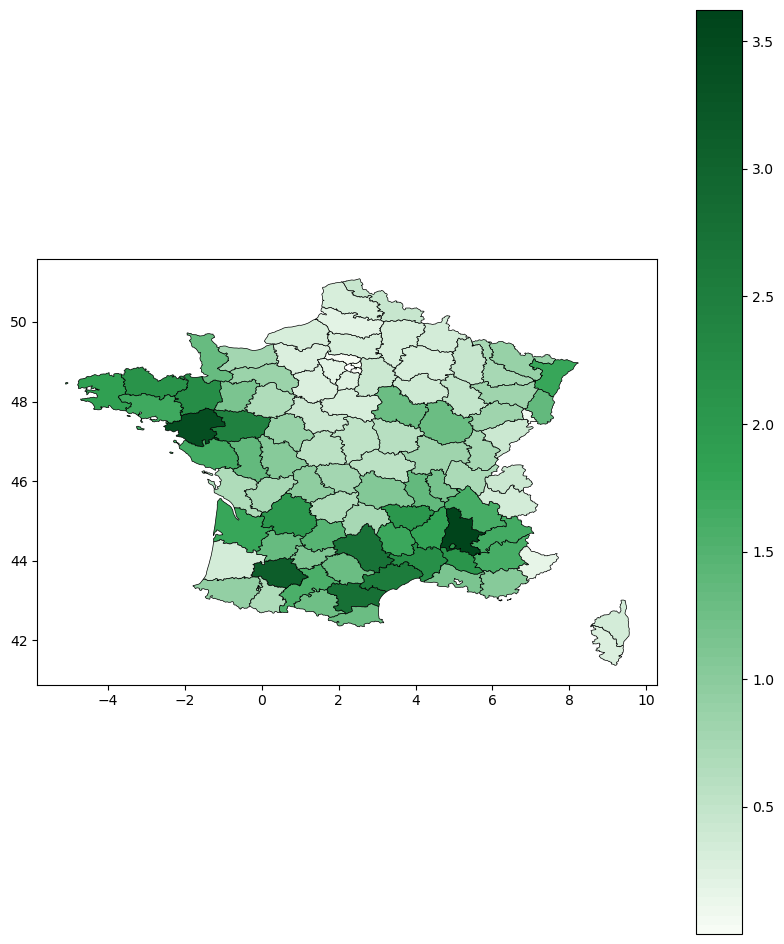

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# Définir une colormap en nuances de vert
greens = LinearSegmentedColormap.from_list("greens", ['#f7fcf5', '#31a354', '#00441b'], N=100)

# GeoDataFrames
gdf_2021 = gdf2021  # Assurez-vous que cette variable est définie
gdf_2022 = gdf2022  # Assurez-vous que cette variable est définie
gdf_2023 = gdf_dep_final  # Pour 2023

# Créer la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 12))

# Afficher les données pour 2023 (fond principal)
gdf_2023.plot(
    column='ratio_parcelles',  # Colonne ratio_parcelles
    cmap=greens,
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Ajouter les données pour 2022 (hachures '//')
gdf_2022.plot(
    column='ratio_parcelles',
    cmap=greens,
    linewidth=0.5,
    edgecolor='black',
    hatch='//',  # Hachures pour 2022
    alpha=0.6,
    ax=ax
)

# Ajouter les données pour 2021 (hachures '\\')
gdf_2021.plot(
    column='ratio_parcelles',
    cmap=greens,
    linewidth=0.5,
    edgecolor='black',
    hatch='\\',  # Hachures inversées pour 2021
    alpha=0.6,
    ax=ax
)

# Ajouter une légende personnalisée
patch_2023 = mpatches.Patch(color='#31a354', label='2023')
patch_2022 = mpatches.Patch(facecolor='none', hatch='//', edgecolor='black', linewidth=0.5, label='2022')
patch_2021 = mpatches.Patch(facecolor='none', hatch='\\', edgecolor='black', linewidth=0.5, label='2021')

plt.legend(handles=[patch_2023, patch_2022, patch_2021], loc='upper right')

# Titre et ajustement
plt.title("Évolution des parcelles bio par département (2021-2023)")
ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
gdf_dep_final.columns

Index(['code', 'nom', 'geometry', 'code_depar', 'nb_parcelles_bio',
       'ratio_parcelles'],
      dtype='object')

In [ ]:
gdf_2021.columns

Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'geometry'],
      dtype='object')

In [ ]:
gdf2021.columns

Index(['gid', 'millesime', 'code_culture', 'lbl_culture', 'grp_culture',
       'surface_ha', 'code_commune_insee', 'lbl_commune', 'code_epci',
       'code_departement', 'geometry'],
      dtype='object')